In [1]:
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Carga CSVs en DataFrames
goals = pd.read_csv("../../data/to_np_csv/GOALS.csv")
alegria = pd.read_csv("../../data/to_np_csv/ALEGRIA.csv")
roullette= pd.read_csv("../../data/to_np_csv/ROULLETTE.csv")
oil_barrel = pd.read_csv("../../data/to_np_csv/OIL_BARREL.csv")

In [3]:
sns.set(style="whitegrid")

In [4]:
summary = pd.DataFrame(columns=pd.MultiIndex.from_tuples([
    ('Kolmogorov-Smirnov', 'Statistic'), 
    ('Kolmogorov-Smirnov', 'P-value'), 
    ('Shapiro-Wilk', 'Statistic'), 
    ('Shapiro-Wilk', 'P-value'), 
    ('Lilliefors', 'Statistic'), 
    ('Lilliefors', 'P-value'),
]))

summary

Empty DataFrame
Columns: [(Kolmogorov-Smirnov, Statistic), (Kolmogorov-Smirnov, P-value), (Shapiro-Wilk, Statistic), (Shapiro-Wilk, P-value), (Lilliefors, Statistic), (Lilliefors, P-value)]
Index: []

## How many goals were scored in the 2010 FIFA World Cup?

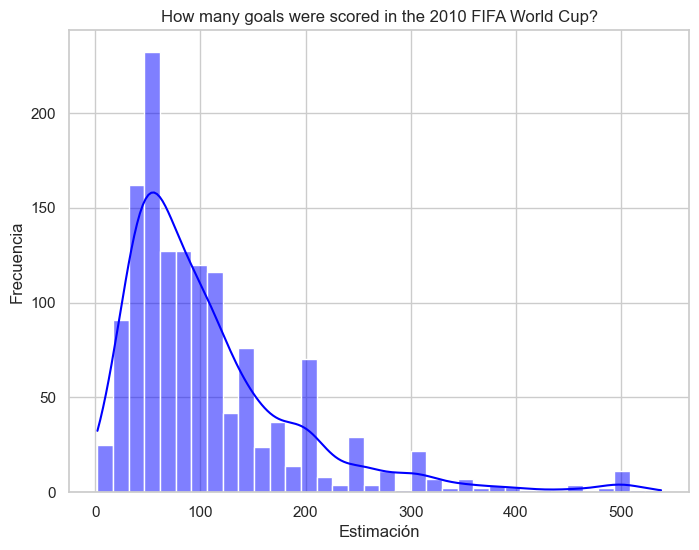

Mean: 107.94164265129683
Standard Deviation: 85.84989695786686


In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(goals['0'], kde=True, color='blue')
plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(goals['0'])
std = np.std(goals['0'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

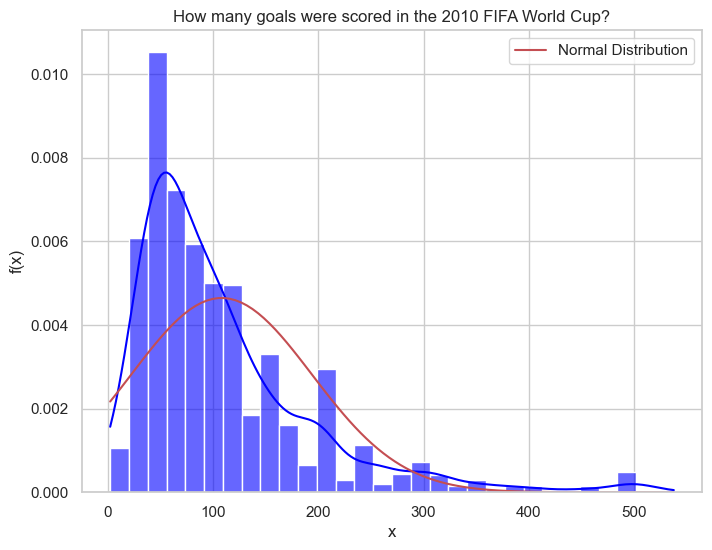

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(goals['0'], kde=True, stat='density', bins=30, color='blue', alpha=0.6)

mean, std = np.mean(goals['0']), np.std(goals['0'])

# Superposición de curva normal
x = np.linspace(min(goals['0']), max(goals['0']), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

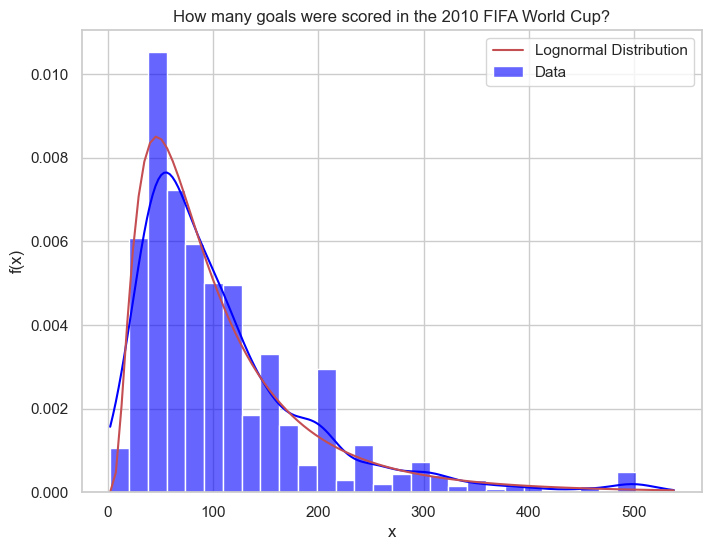

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(goals['0'], kde=True, stat='density', bins=30, color='blue', alpha=0.6 , label='Data')

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(goals['0'], floc=0)

# Superposición de curva lognormal
x = np.linspace(min(goals['0']), max(goals['0']), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'r-', label='Lognormal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/goals_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [8]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(goals['0'], floc=0)

# Ejecución test Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(goals['0'], 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Prueba de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha}")

summary.loc['GOALS', ('Kolmogorov-Smirnov', 'Statistic')] = ks_stat
summary.loc['GOALS', ('Kolmogorov-Smirnov', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.041310736351122986
P-value: 0.017027892363311967
Reject the null hypothesis (H0)
Minimum value of alpha: 0.017368450210578205


### Transformación log -> normal

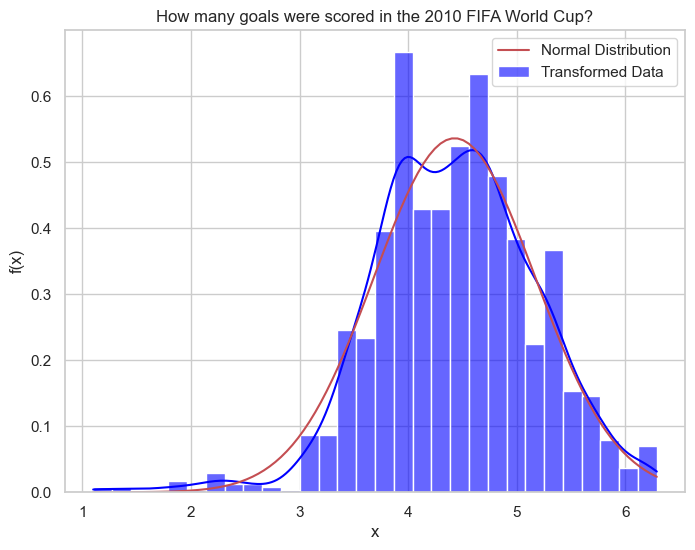

In [9]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(goals['0'])

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='blue', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many goals were scored in the 2010 FIFA World Cup?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/goals_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [10]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['GOALS', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['GOALS', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9839416146278381
P-value: 2.714046348772925e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000002768327276


#### Test: Lilliefors (Normal)

In [11]:
lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['GOALS', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['GOALS', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.03994751615886189
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [12]:
summary

Kolmogorov-Smirnov           Shapiro-Wilk         Lilliefors        
               Statistic   P-value    Statistic P-value  Statistic P-value
GOALS           0.041311  0.017028     0.983942     0.0   0.039948   0.001

## How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?

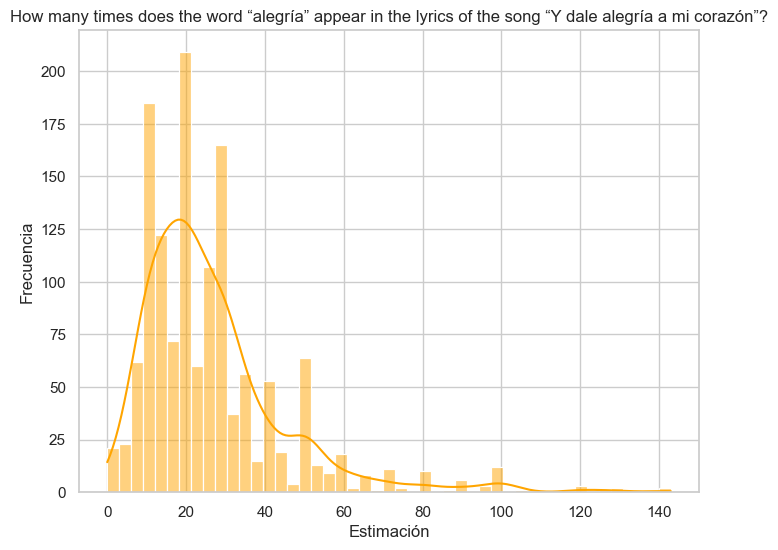

Mean: 26.788252356780276
Standard Deviation: 18.800316478755448


In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria['1'], kde=True, color='orange')
plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(alegria['1'])
std = np.std(alegria['1'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

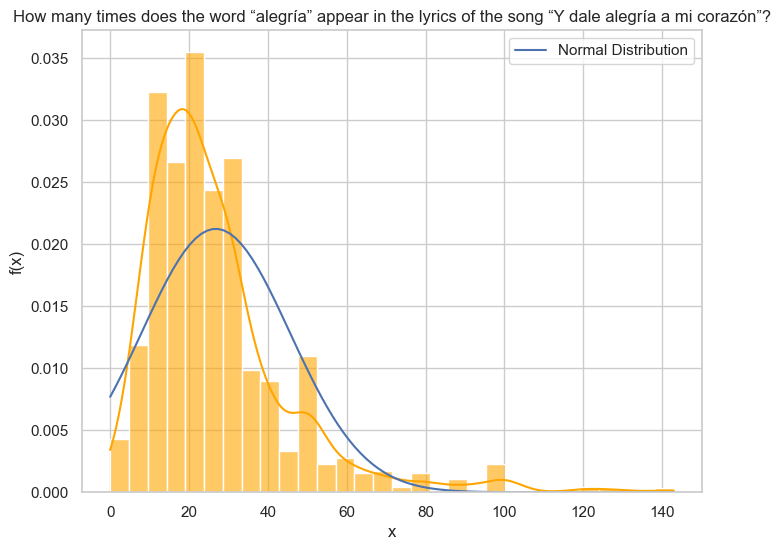

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria['1'], kde=True, stat='density', bins=30, color='orange', alpha=0.6)

mean, std = np.mean(alegria['1']), np.std(alegria['1'])

# Superposición de curva normal
x = np.linspace(min(alegria['1']), max(alegria['1']), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'b-', label='Normal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In [15]:
alegria_negative = alegria[alegria['1'] <= 0] # 344 y 1207
print(alegria_negative)

      1
337   0
1187  0


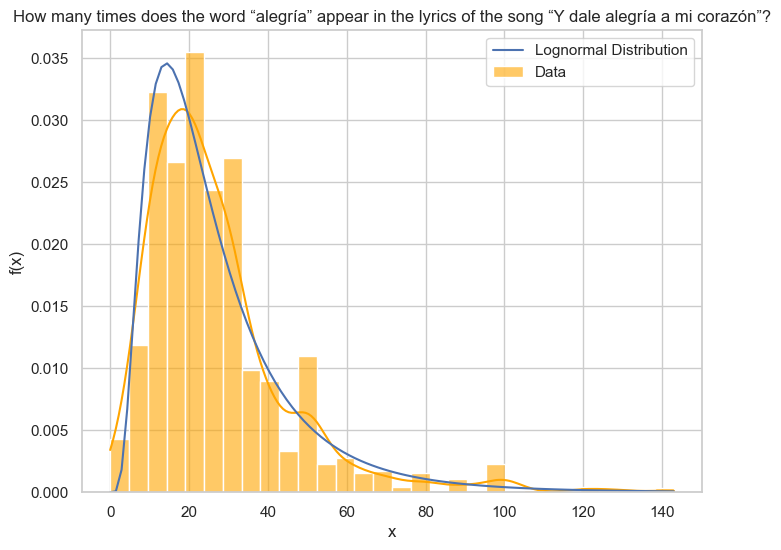

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(alegria['1'], kde=True, stat='density', bins=30, color='orange', alpha=0.6 , label='Data')

# Solo positivos
alegria_positive = alegria[alegria['1'] > 0]

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(alegria_positive['1'], floc=0)

# Superposición de curva lognormal
x = np.linspace(min(alegria['1']), max(alegria['1']), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'b-', label='Lognormal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/alegria_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [17]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(alegria_positive['1'], floc=0)

# Test Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(alegria_positive['1'], 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chequeo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('Kolmogorov-Smirnov', 'Statistic')] = ks_stat
summary.loc['ALEGRIA', ('Kolmogorov-Smirnov', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.09039064699973476
P-value: 3.064021769476001e-10
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000031253022049


### Transformación log -> normal

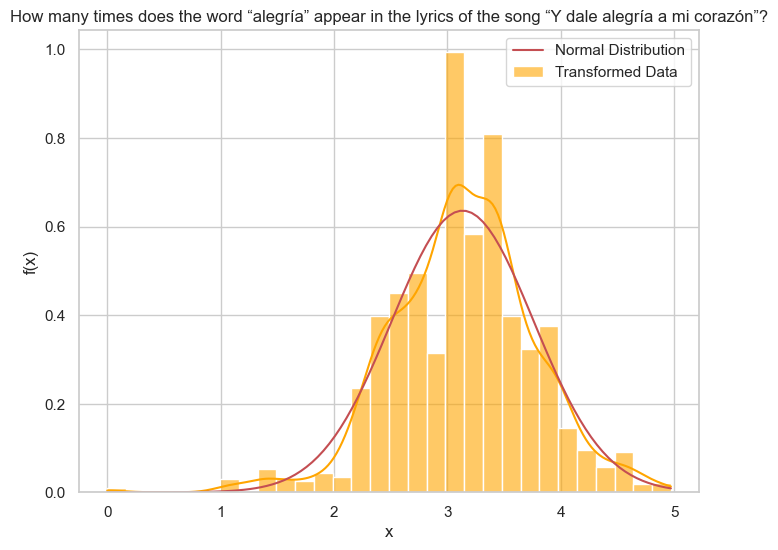

In [18]:
transformed_data = np.log1p(alegria['1'])

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='orange', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How many times does the word “alegría” appear in the lyrics of the song “Y dale alegría a mi corazón”?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/alegria_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['ALEGRIA', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9833033084869385
P-value: 1.5691378751903073e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000001600520633


In [20]:
lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ALEGRIA', ('Lilliefors', 'Statistic')] = shapiro_stat
summary.loc['ALEGRIA', ('Lilliefors', 'P-value')] = shapiro_p_value

Lilliefors Test Statistic: 0.0858560665099129
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [21]:
summary

Kolmogorov-Smirnov           Shapiro-Wilk         Lilliefors        
                 Statistic   P-value    Statistic P-value  Statistic P-value
GOALS             0.041311  0.017028     0.983942     0.0   0.039948   0.001
ALEGRIA           0.090391       0.0     0.983303     0.0   0.983303     0.0

## What is the sum of all numbers in a roulette wheel?

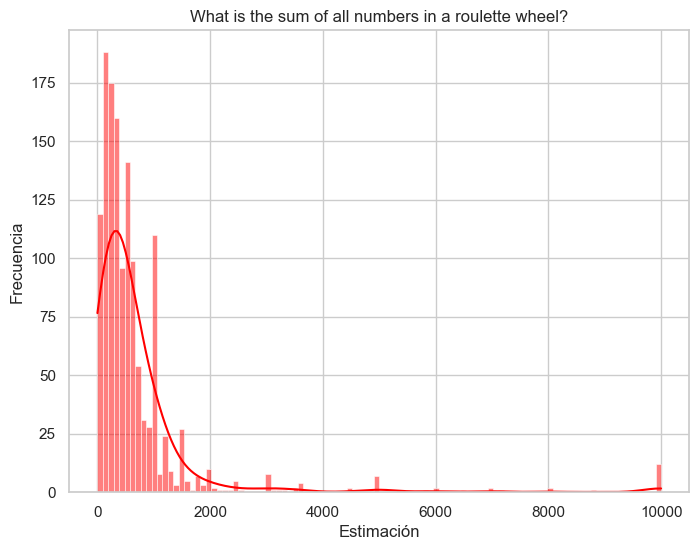

Mean: 712.3995584988962
Standard Deviation: 1246.1763405311438


In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette['2'], kde=True, color = 'red')
plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(roullette['2'])
std = np.std(roullette['2'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

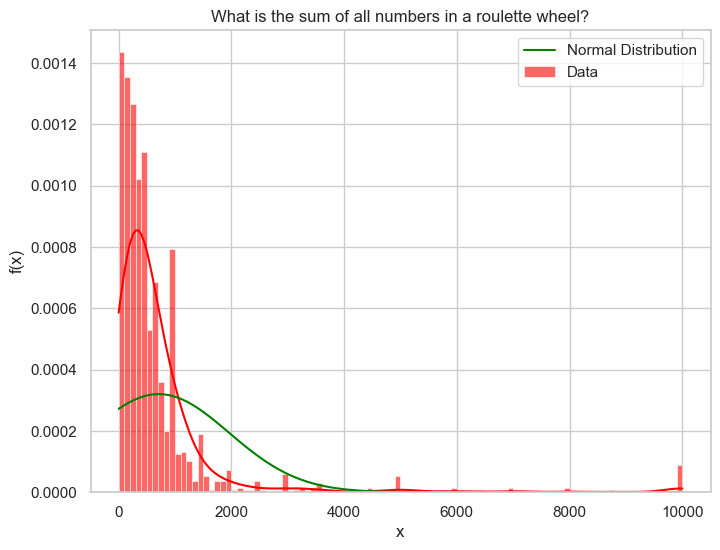

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette['2'], kde=True, stat='density', bins=100, color='red', alpha=0.6, label='Data')

mean, std = np.mean(roullette['2']), np.std(roullette['2'])

# Superposición de curva normal
x = np.linspace(min(roullette['2']), max(roullette['2']), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'green', label='Normal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

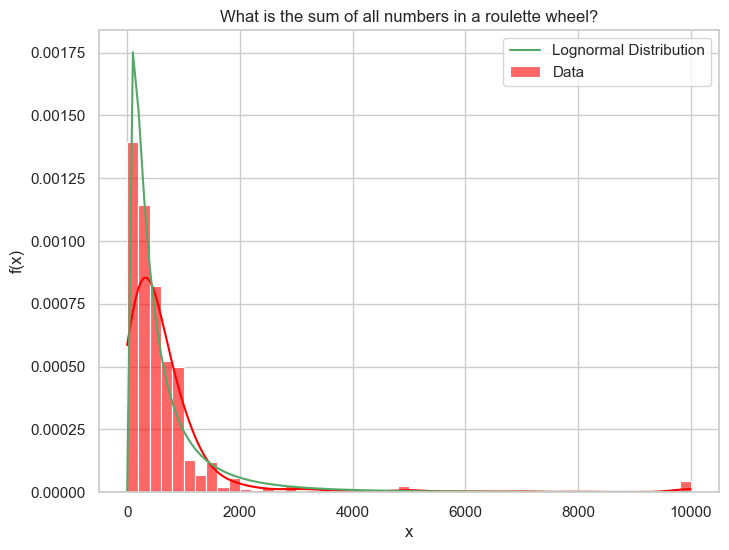

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(roullette['2'], kde=True, stat='density', bins=50, color='red', alpha=0.6 , label='Data')

# Fit a lognormal distribution to the data
shape, loc, scale = stats.lognorm.fit(roullette['2'], floc=0)

# Overlay Lognormal distribution
x = np.linspace(min(roullette['2']), max(roullette['2']), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'g-', label='Lognormal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/roullette_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Kolmogorov-Smirnov (log-normal)

In [25]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(roullette['2'], floc=0)

ks_stat, ks_p_value = stats.kstest(roullette['2'], 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('Kolmogorov-Smirnov', 'Statistic')] = ks_stat
summary.loc['ROULLETTE', ('Kolmogorov-Smirnov', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.06519196094184443
P-value: 1.825835035738661e-05
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00001862351736453434


### Transformación log -> normal

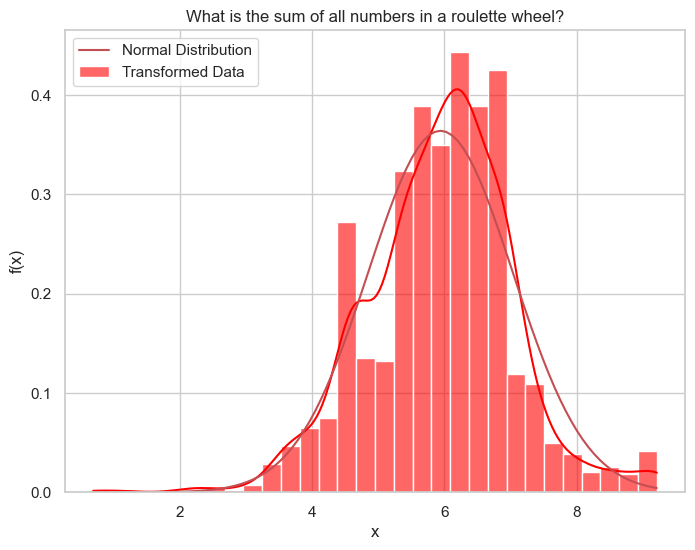

In [26]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(roullette['2'])

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='red', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('What is the sum of all numbers in a roulette wheel?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/roullette_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [27]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['ROULLETTE', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9835315346717834
P-value: 2.545114813345961e-11
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000002596017110


#### Test: Lilliefors (Normal)

In [28]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['ROULLETTE', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['ROULLETTE', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.06436055739336022
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [29]:
summary

Kolmogorov-Smirnov           Shapiro-Wilk         Lilliefors        
                   Statistic   P-value    Statistic P-value  Statistic P-value
GOALS               0.041311  0.017028     0.983942     0.0   0.039948   0.001
ALEGRIA             0.090391       0.0     0.983303     0.0   0.983303     0.0
ROULLETTE           0.065192  0.000018     0.983532     0.0   0.064361   0.001

## How much did a barrel of oil cost in 1970 (in US dollars cents)?

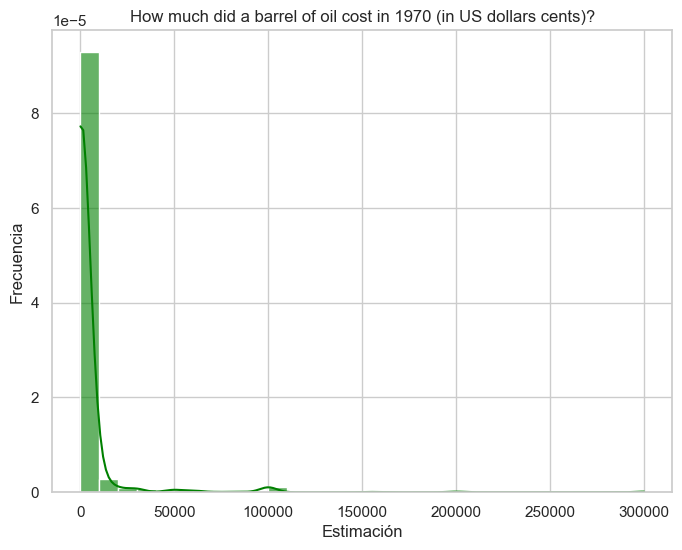

Mean: 4154.071126126127
Standard Deviation: 19353.25275384711


In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel['3'], kde=True, stat='density', bins=30, color='green', alpha=0.6)
plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('Estimación')
plt.ylabel('Frecuencia')
plt.show()

mean = np.mean(oil_barrel['3'])
std = np.std(oil_barrel['3'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

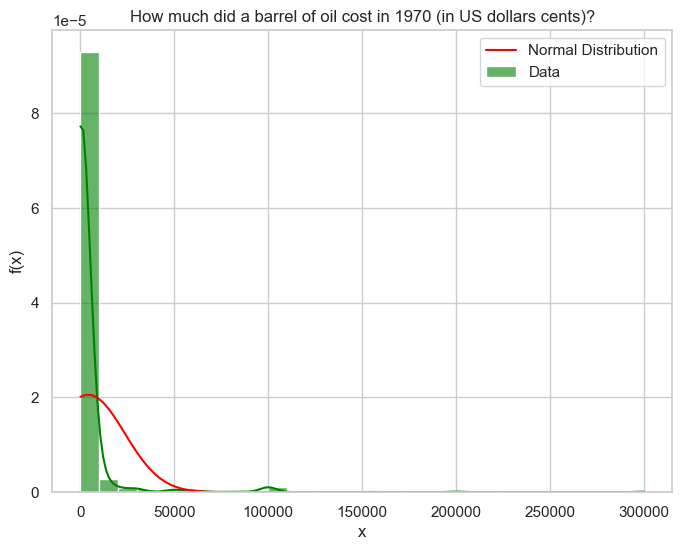

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel['3'], kde=True, stat='density', bins=30, color='green', alpha=0.6, label='Data')

mean, std = np.mean(oil_barrel['3']), np.std(oil_barrel['3'])

# Superposición de curva normal
x = np.linspace(min(oil_barrel['3']), max(oil_barrel['3']), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'red', label='Normal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In [32]:
oil_negative = oil_barrel[oil_barrel['3'] <= 0] #165 y 330
print(oil_negative)

       3
155  0.0
314  0.0


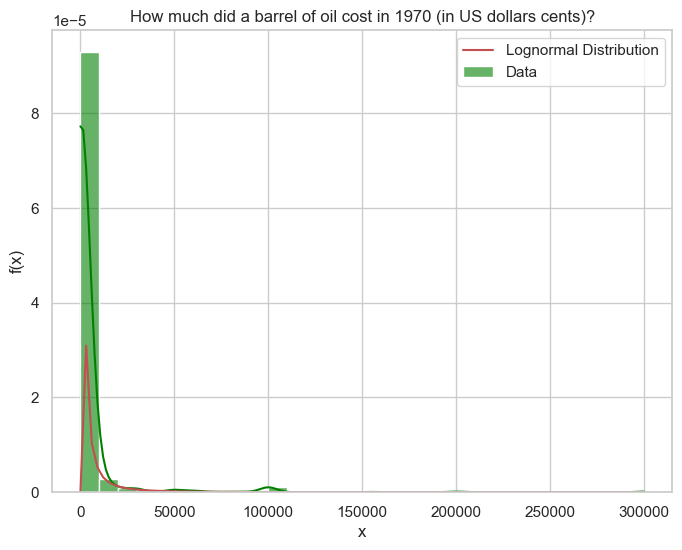

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(oil_barrel['3'], kde=True, stat='density', bins=30, color='green', alpha=0.6 , label='Data')

# Solo positivos
oil_positive = oil_barrel[oil_barrel['3'] > 0]

# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(oil_positive['3'], floc=0)

# Superposición de curva lognormal
x = np.linspace(min(oil_barrel['3']), max(oil_barrel['3']), 100)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_lognormal, 'r-', label='Lognormal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/oil_distribution_log.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
from scipy.integrate import quad

# Integrate the PDF of the lognormal distribution over the range
area, _ = quad(lambda x: stats.lognorm.pdf(x, shape, loc, scale), min(oil_barrel['3']), max(oil_barrel['3']))

print(f"Area under the lognormal PDF: {area}")


Area under the lognormal PDF: 0.9993192629390473


#### Test: Kolmogorov-Smirnov (log-normal)

In [35]:
# Estimación de parámetros de la distribución lognormal
shape, loc, scale = stats.lognorm.fit(oil_positive['3'], floc=0)

ks_stat, ks_p_value = stats.kstest(oil_positive['3'], 'lognorm', args=(shape, loc, scale))

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Chqueo de hipótesis
alpha = 0.05
if ks_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = ks_p_value * 0.02
min_alpha = ks_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('Kolmogorov-Smirnov', 'Statistic')] = ks_stat
summary.loc['OIL_BARREL', ('Kolmogorov-Smirnov', 'P-value')] = ks_p_value

Kolmogorov-Smirnov Test Statistic: 0.10528167251587583
P-value: 2.729646227224585e-13
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000000027842392


### Transformación log -> normal

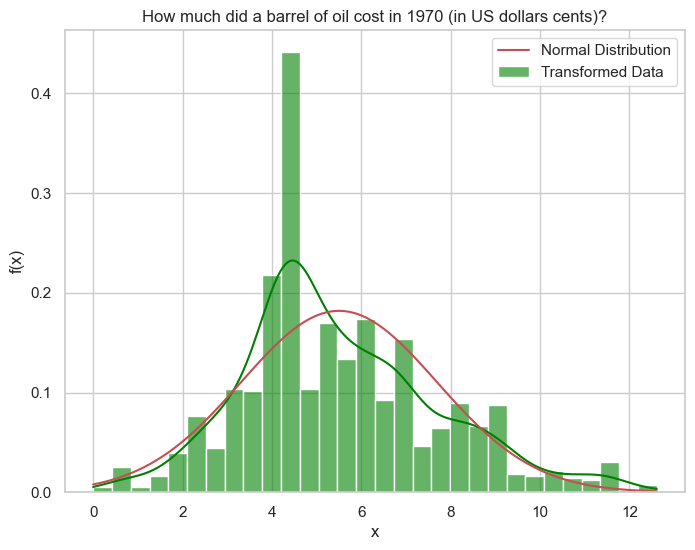

In [36]:
# Aplicar transformación logarítmica
transformed_data = np.log1p(oil_barrel['3'])

plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, stat='density', bins=30, color='green', alpha=0.6 , label='Transformed Data')

mean, std = np.mean(transformed_data), np.std(transformed_data)

# Superposición de curva normal
x = np.linspace(min(transformed_data), max(transformed_data), 100)
pdf_normal = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')

plt.title('How much did a barrel of oil cost in 1970 (in US dollars cents)?')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.savefig('plots_navajas/oil_distribution_normal.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

#### Test: Shapiro-Wilk (Normal)

In [37]:
shapiro_stat, shapiro_p_value = stats.shapiro(transformed_data)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p_value}")

# Chequeo de hipoótesis
alpha = 0.05
if shapiro_p_value > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = shapiro_p_value * 0.02
min_alpha = shapiro_p_value + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('Shapiro-Wilk', 'Statistic')] = shapiro_stat
summary.loc['OIL_BARREL', ('Shapiro-Wilk', 'P-value')] = shapiro_p_value

Shapiro-Wilk Test Statistic: 0.9730969667434692
P-value: 4.7153477140699646e-15
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00000000000000480965


#### Test: Lilliefors (Normal)

In [38]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors_stat, lilliefors_pvalue = lilliefors(transformed_data)

print(f"Lilliefors Test Statistic: {lilliefors_stat}")
print(f"P-value: {lilliefors_pvalue}")

# Chequeo de hipoótesis
alpha = 0.05
if lilliefors_pvalue > alpha:
    print("Failed to reject the null hypothesis (H0)")
else:
    print("Reject the null hypothesis (H0)")

eps = lilliefors_pvalue * 0.02
min_alpha = lilliefors_pvalue + eps
print(f"Minimum value of alpha: {min_alpha:.20f}")

summary.loc['OIL_BARREL', ('Lilliefors', 'Statistic')] = lilliefors_stat
summary.loc['OIL_BARREL', ('Lilliefors', 'P-value')] = lilliefors_pvalue

Lilliefors Test Statistic: 0.1095928991404958
P-value: 0.0009999999999998899
Reject the null hypothesis (H0)
Minimum value of alpha: 0.00101999999999988775


In [39]:
summary

Kolmogorov-Smirnov           Shapiro-Wilk         Lilliefors  \
                    Statistic   P-value    Statistic P-value  Statistic   
GOALS                0.041311  0.017028     0.983942     0.0   0.039948   
ALEGRIA              0.090391       0.0     0.983303     0.0   0.983303   
ROULLETTE            0.065192  0.000018     0.983532     0.0   0.064361   
OIL_BARREL           0.105282       0.0     0.973097     0.0   0.109593   

                    
           P-value  
GOALS        0.001  
ALEGRIA        0.0  
ROULLETTE    0.001  
OIL_BARREL   0.001